In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nr143\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

In [5]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [6]:
# Function to display sample images from the dataset
def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

Sample images from the training set:


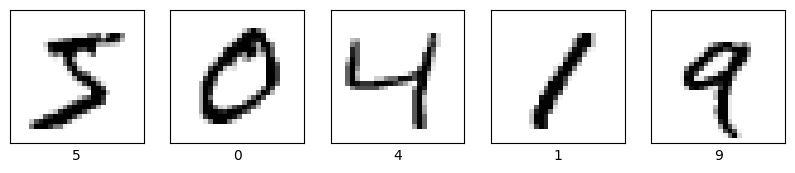

In [7]:
# Display sample images from the training set
print("Sample images from the training set:")
display_samples(train_images, train_labels)


Sample images from the test set:


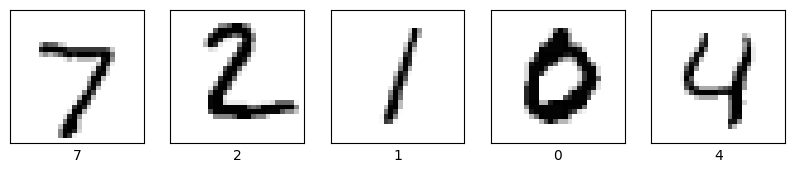

In [8]:
# Display sample images from the test set
print("\nSample images from the test set:")
display_samples(test_images, test_labels)

In [9]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Reshape the images to add the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28,
1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [11]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,
1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\nr143\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9556 - loss: 0.1395 - val_accuracy: 0.9867 - val_loss: 0.0412
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9880 - val_loss: 0.0337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9908 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9902 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9904 - val_loss: 0.0317


In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels,
verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9904 - loss: 0.0317

Test accuracy: 0.9904000163078308


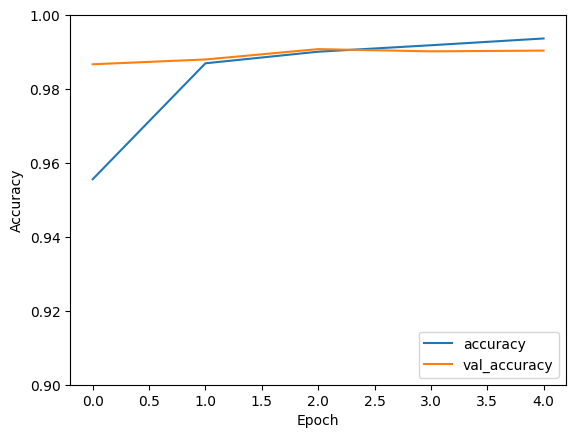

In [15]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()